# 다항회귀
- 다항회귀의 $X^n$을 $Z_m$으로 치환하면 선형회귀와 같아짐
    - 회귀계수가 선형/비선형인지에 따라 선형/비선형회귀로 갈라짐

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

`PolynomialFeatures(degree=2)`  
$[x_1, x_2] \rightarrow [1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$

In [2]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

`PolynomialFeatures(degree=2)`  
$[x_1, x_2, x_3] \rightarrow [1, x_1, x_2, x_3, x_1^2, x_1x_2, x_1x_3, x_2^2, x_2x_3, x_3^2]$

In [3]:
X2 = np.arange(9).reshape(3, 3)
poly.fit_transform(X2)

array([[ 1.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
       [ 1.,  6.,  7.,  8., 36., 42., 48., 49., 56., 64.]])

`PolynomialFeatures(degree=3)`  
$[x_1, x_2] \rightarrow [1, x_1, x_2, x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3]$

In [4]:
poly = PolynomialFeatures(degree=3)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

## 3차 다항식을 선형회귀로 구하기
$ y = 1+2x_1 + 3x_1^2 + 4x_2^3$

In [6]:
def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
#     print(X[:, 0])
#     print(X[:, 1])
    return y

X = np.arange(0, 4).reshape(2, 2)
print('일차 단항식 계수 feature :\n', X)

y = polynomial_func(X)
print('삼차 다항식 결정값 :\n', y)

일차 단항식 계수 feature :
 [[0 1]
 [2 3]]
삼차 다항식 결정값 :
 [  5 125]


In [8]:
from sklearn.linear_model import LinearRegression

poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature :\n', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 :\n', np.round(model.coef_, 2))
print('Polynomial 회귀 shape :', model.coef_.shape)

3차 다항식 계수 feature :
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 :
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape : (10,)


### 파이프라인 활용

In [9]:
from sklearn.pipeline import Pipeline

# Streamline하게 Polynomial Feature 변환과 Linear Regression 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])

model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 가상 데이터
$ y = 0.5X^2 + X + 2$

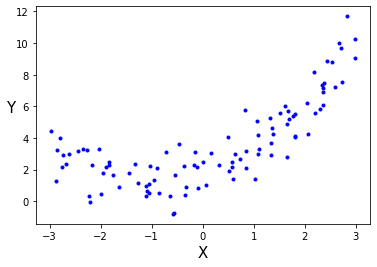

In [11]:
import matplotlib.pyplot as plt
m = 100
X = 6 * np.random.rand(m, 1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')
plt.ylabel('Y', fontsize=15, rotation=0)
plt.xlabel('X', fontsize=15)
plt.show()

In [12]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print('절편 :', lin_reg.intercept_)
print('계수 :', lin_reg.coef_)

절편 : [1.7532005]
계수 : [[1.06646665 0.54742294]]


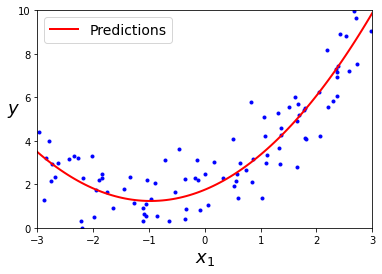

In [14]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## 주택 가격

In [15]:
from sklearn.datasets import load_boston

boston = load_boston()
bostonDF = pd.DataFrame(data=boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,
                                                   test_size=0.3, random_state=156)

In [20]:
p_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                 ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
print('Polynomial 회귀 계수\n', np.round(p_model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [-1.09063739e+09 -8.13000000e+00 -9.00000000e-02 -7.01000000e+00
  3.69700000e+01  2.53630000e+02  3.09600000e+01  1.25000000e+00
 -1.20200000e+01  3.09000000e+00 -1.30000000e-01  7.76000000e+00
  5.00000000e-02  5.10000000e-01 -0.00000000e+00  2.70000000e-01
  6.00000000e-01  1.86000000e+00 -1.40000000e-01 -0.00000000e+00
  1.00000000e-02 -1.00000000e-01  5.90000000e-01 -6.00000000e-02
  9.60000000e-01 -0.00000000e+00  4.00000000e-02 -0.00000000e+00
 -3.00000000e-02 -2.10000000e-01 -2.11000000e+00 -7.00000000e-02
  0.00000000e+00 -3.00000000e-02  1.00000000e-02  0.00000000e+00
 -2.00000000e-02  1.00000000e-02 -1.00000000e-02  4.00000000e-02
 -5.30000000e-01 -7.00000000e-02  1.90000000e-01  1.00000000e-02
  1.80000000e-01 -4.00000000e-02  0.00000000e+00 -7.00000000e-02
  1.00000000e-02 -2.00000000e-02  3.69700000e+01 -2.92400000e+01
 -5.98000000e+00 -3.00000000e-02  1.74000000e+00  3.00000000e-02
  3.00000000e-02 -1.99000000e+00  3.00000000e-02 -1.70000000e-01
 -7.701

In [21]:
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')
print(f'Variance Score : {r2_score(y_test, y_preds):.3f}')

MSE : 41.731, RMSE : 6.460
Variance Score : 0.414


피쳐가 13개에서 104개로 늘어나면서 overfitting

### 튜닝
- `include_bias=True` : 절편에 대한 항을 주는 것
    - $[x_1, x_2] \rightarrow [1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$
- `include_bias=False` : 절편에 대한 항을 주지 않는 것
    - $[x_1, x_2] \rightarrow [x_1, x_2, x_1^2, x_1x_2, x_2^2]$

In [25]:
x = np.array([[1, 2]])
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x_poly

array([[1., 2., 1., 2., 4.]])

In [22]:
p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                 ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
print('Polynomial 회귀 계수\n', np.round(p_model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [-8.0300e+00 -1.0000e-01 -6.9900e+00  3.7020e+01  2.5166e+02  3.0840e+01
  9.6000e-01 -1.1890e+01  3.1400e+00 -1.0000e-02  7.7200e+00 -1.0000e-02
  4.2000e-01 -0.0000e+00  2.7000e-01  7.6000e-01  1.8600e+00 -1.2000e-01
  1.7000e-01 -0.0000e+00 -2.8000e-01  5.8000e-01 -5.0000e-02  7.8000e-01
 -0.0000e+00  4.0000e-02 -0.0000e+00 -1.0000e-02 -1.3000e-01 -2.0800e+00
  3.0000e-02  0.0000e+00 -1.0000e-02  1.0000e-02  0.0000e+00 -1.0000e-02
  0.0000e+00 -0.0000e+00  5.0000e-02 -4.7000e-01 -1.4000e-01  3.7000e-01
  1.0000e-02  2.4000e-01 -6.0000e-02  0.0000e+00  0.0000e+00  1.0000e-02
 -1.0000e-02  3.7020e+01 -2.9070e+01 -5.9600e+00 -6.0000e-02  1.8000e+00
 -7.0000e-02  4.0000e-02 -1.8300e+00  1.0000e-02 -1.0000e-01 -7.6240e+01
 -4.9800e+00 -5.9000e-01  2.2750e+01 -4.9900e+00  4.8000e-01 -1.7670e+01
 -3.0000e-02  1.2700e+00 -3.0000e-02 -5.0000e-02 -1.5000e-01 -8.0000e-02
 -2.0000e-02 -7.3000e-01  0.0000e+00 -1.8000e-01 -0.0000e+00 -2.0000e-02
  2.0000e-02 -0.0000e+00  1.0000e

In [23]:
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')
print(f'Variance Score : {r2_score(y_test, y_preds):.3f}')

MSE : 15.556, RMSE : 3.944
Variance Score : 0.782
